# Objective

Explore the provided audio files, to gain an understanding of the data I have to work with, and understand methods I can apply to create a model that distinguishes between the different emotions in the audio files.

Based on the provided data, there should be 4 classes that the files can be classified as (happy, sad, angry, and calm).

# Preparation

In [1]:
# Load libraries
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
# Data location
folder_raw = "../data/raw/"

# Functions

In [3]:
# Displays the first x .wave files in a graph
def display_waveform(directory, graphs_number):
    for filename in os.listdir(directory)[:graphs_number]:
        if filename.endswith(".wav"):  # Adjust for your file format
            file_path = os.path.join(directory, filename)

            # Load the audio file
            y, sr = librosa.load(file_path)

            plt.figure(figsize=(14, 5))
            librosa.display.waveshow(y, sr=sr)
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.title("Waveform")
            print(plt.show())

In [4]:
# Displays the first x .wave mfcc in a graph
def display_mfcc(df, column, graphs_number):
    for audio in df[column][:graphs_number]:
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(np.array(audio), x_axis='time')
            plt.colorbar()
            plt.title(column)
            plt.tight_layout()
            plt.show()

In [5]:
# Extract key audio features from the audio files
def features_extraction(folder_raw, file_suffix='.wav'):
    features_list = []
    feature_dict = []
    df_features = pd.DataFrame()
    
    for filename in os.listdir(folder_raw):
        # Filter files by prefix and suffix
        if filename.endswith(".wav"):
            # Load audio data
            file_path = (folder_raw+ filename)
            audio, sr = librosa.load(file_path, sr=None)
            # Extract features
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=10)
            #mfccs_mean = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=10).T, axis=0)
            zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio).T, axis=0)
            spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sr), axis=1)
            chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sr), axis=1)
            file_size_byt = os.path.getsize(file_path)
            audio_length_sec = librosa.get_duration(y=audio, sr=sr)
            stereo_true = audio.ndim == 2
            #Store features in a dictionary
            feature_dict = {
                'file_name': filename,
                'mfcc': mfccs.tolist(),
                'zcr': zcr,
                'spectral_contrast': spectral_contrast,
                'chroma': chroma,
                'file_size_byt' : file_size_byt,
                'audio_length_sec' : audio_length_sec,
                'sample_rate' : sr,
                'stereo_true' : stereo_true
            }
            features_list.append(feature_dict)
    
    # Convert the list of feature dictionaries to a dataFrame
    df_features = pd.DataFrame(features_list)
    return df_features

# Analysis

As a start, I listened to a couple of audio files to get an understanding of the available data to create the model. My observations:
- **clean audio** - I can't hear much background noise, which should make it easier to create a model because there is only one voice audible;
- **same phrase** - all voices are saying the same phrase "Kids are talking by the door". I would assume that it will be easier to extract emotions;
- **silent start and end** - I can't hear any noise at the beginning or the end of the audio.

In summary, the audio data is quite clean, which should make it easier to create models. Real world voice data will likely be much noiser and difficult to work with.

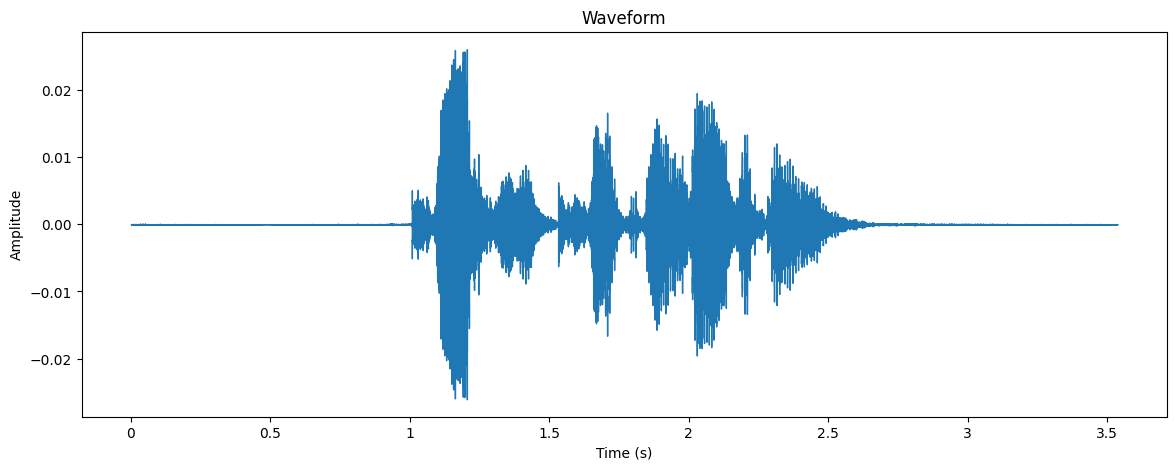

None


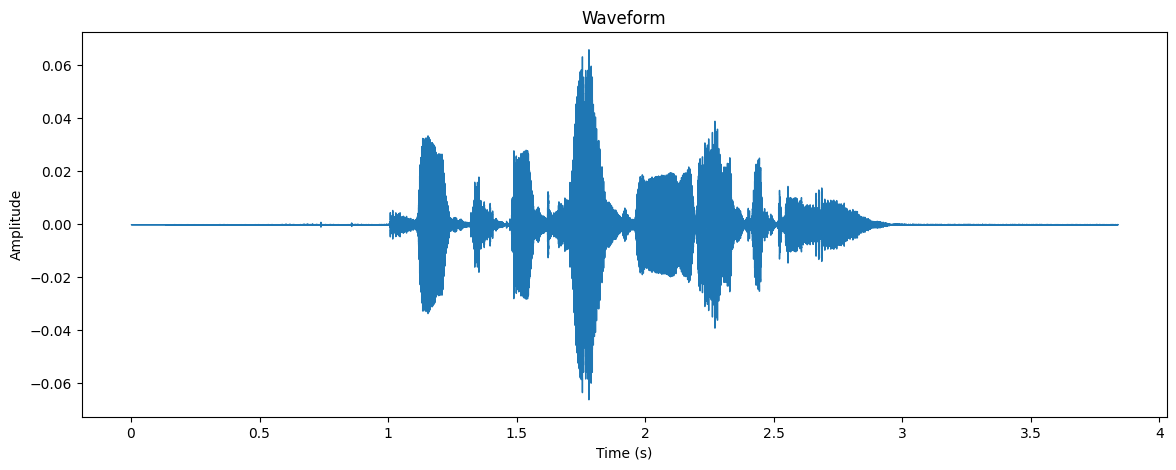

None


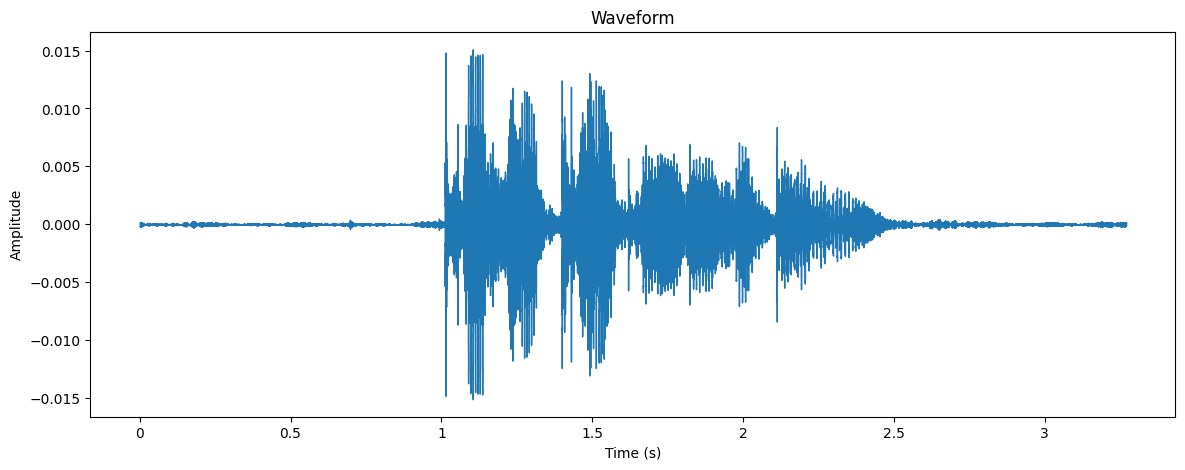

None


In [6]:
display_waveform(folder_raw, 4)

Visualising the first couple of audio files, 
I can see that the audio files have been recorded with a pause 
at the beginning and end. This will help to have clear recordings
for model training.
Potentially I could remove the start and end of the file, 
but if all recordings have this structure, there is no need for the first model.
This can be considered once optimising.

In [7]:
df_features = features_extraction(folder_raw)
df_features.head(3)

,file_name,mfcc,zcr,spectral_contrast,chroma,file_size_byt,audio_length_sec,sample_rate,stereo_true
0,0.wav,"[[-915.6934204101562, -913.8789672851562, -910...",[0.04592932275978916],"[15.227691520607424, 9.126892912028717, 12.107...","[0.5568814, 0.5957135, 0.6107088, 0.59007627, ...",399494,3.536854,48000,False
1,1.wav,"[[-857.8080444335938, -857.8080444335938, -857...",[0.06289876302083333],"[11.884106723036123, 13.45568672833903, 14.271...","[0.49663052, 0.42590836, 0.40389, 0.45253736, ...",429350,3.837167,48000,False
2,10.wav,"[[-880.078125, -893.4799194335938, -927.207458...",[0.051797574816775244],"[15.035632091933932, 9.871613770507599, 11.997...","[0.57913744, 0.6006584, 0.6351366, 0.67363787,...",361136,3.269917,48000,False


In [8]:
df_features.head(3)

,file_name,mfcc,zcr,spectral_contrast,chroma,file_size_byt,audio_length_sec,sample_rate,stereo_true
0,0.wav,"[[-915.6934204101562, -913.8789672851562, -910...",[0.04592932275978916],"[15.227691520607424, 9.126892912028717, 12.107...","[0.5568814, 0.5957135, 0.6107088, 0.59007627, ...",399494,3.536854,48000,False
1,1.wav,"[[-857.8080444335938, -857.8080444335938, -857...",[0.06289876302083333],"[11.884106723036123, 13.45568672833903, 14.271...","[0.49663052, 0.42590836, 0.40389, 0.45253736, ...",429350,3.837167,48000,False
2,10.wav,"[[-880.078125, -893.4799194335938, -927.207458...",[0.051797574816775244],"[15.035632091933932, 9.871613770507599, 11.997...","[0.57913744, 0.6006584, 0.6351366, 0.67363787,...",361136,3.269917,48000,False


In [9]:
df_features.describe()

,file_size_byt,audio_length_sec,sample_rate
count,768.000000,768.000000,768.0
mean,414863.377604,3.749971,48000.0
std,39122.261893,0.315069,0.0
min,331264.000000,2.936271,48000.0
25%,392341.500000,3.536875,48000.0
50%,412121.000000,3.737062,48000.0
75%,431560.000000,3.937255,48000.0
max,863024.000000,5.105104,48000.0


**Audio length** The audio files are between 2.9 and 5.1 seconds. To improve model performance we could adjust files to have the same length. However, it will likely be difficult to decide where to cut the audio. Let's consider this if the model performance isn't great.

**Sample rate**
All audio files have an identical sample rate, so also no need to adjust for standarisation.

In [10]:
df_features['stereo_true'].value_counts()

stereo_true
False    768
Name: count, dtype: int64

All audio files are stereo, so no need to convert some to audio or mono to standardise.

plt.figure(figsize=(10, 4))
librosa.display.specshow(df_features['mfccs'], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

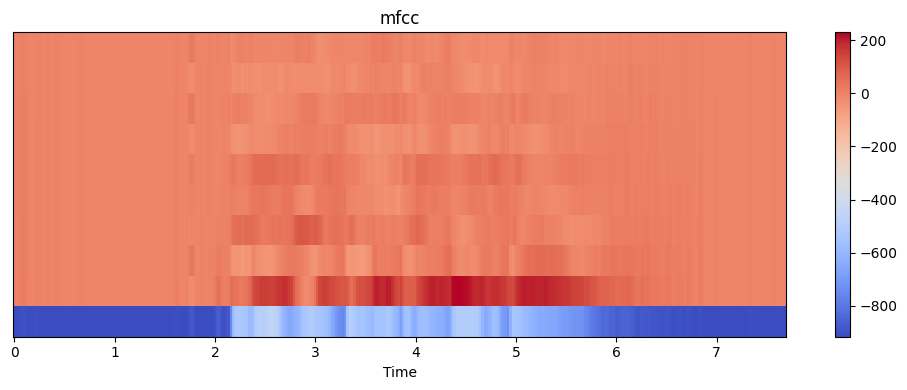

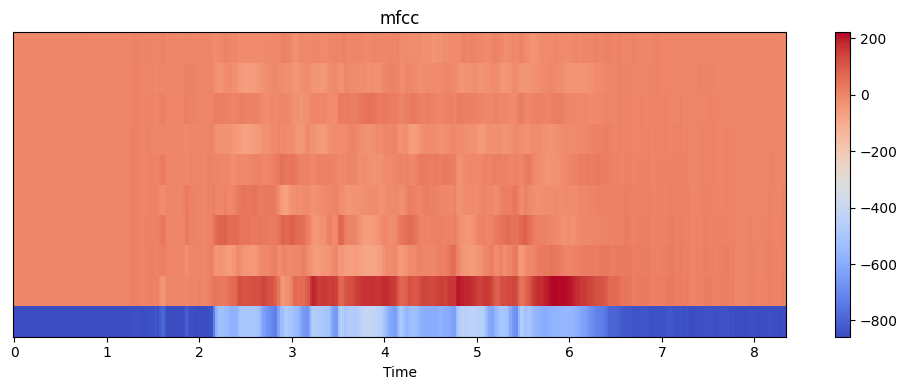

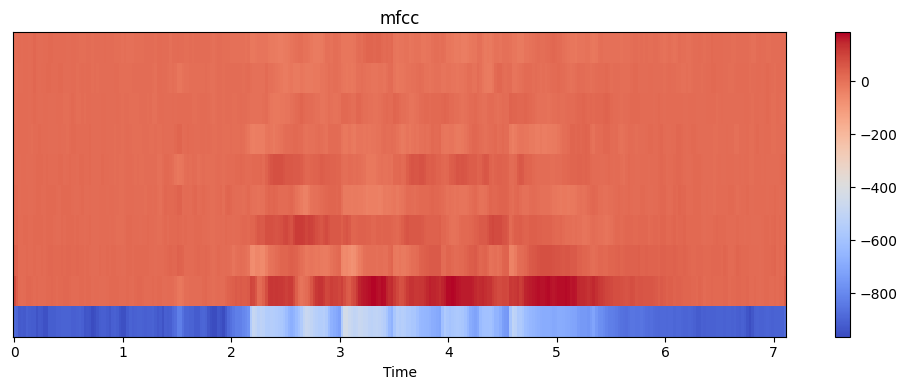

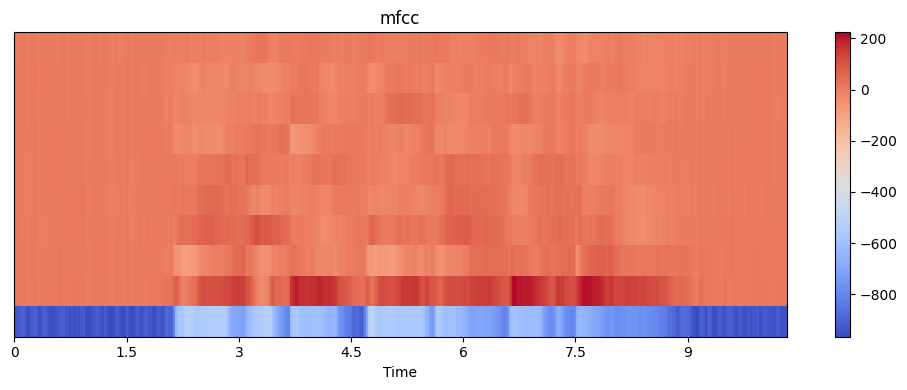

In [11]:
display_mfcc(df_features, 'mfcc', 4)

# Conclusion

**Outcome labels** - there isn't a dataset with emotions outcome labels (i.e. happy, sad, angry, and calm), which I will need to create myself.

**Useful features** - more technical audio features like mfcc, spectral_contrast, chroma appear to be more useful because they differ per audi file.

**Unuseful features** - sample rate, stero/mono, sentence spoken aren't good features as they are identical across audio files.
**Labelling** because there isn't a dataset with emotion outcome labels, I will need to create these myself.

# Next steps
As a next steps, I will be using these learnings from the exploratory data analysis to first (i) clean the data, (ii) label the data and lastly (iii) to create a model.